# EDA 1

In this notebook, we look into data of 1 video. So the relationship of different features are explored.

## Initial Steps

### Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
data_path = 'hand_gesture_data'

In [3]:
a1_raw = pd.read_csv(f'{data_path}/a1_raw.csv')
a1_va3 = pd.read_csv(f'{data_path}/a1_va3.csv')


### Viewing dataset

In [4]:
display(a1_raw.info())
display(a1_va3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lhx        1747 non-null   float64
 1   lhy        1747 non-null   float64
 2   lhz        1747 non-null   float64
 3   rhx        1747 non-null   float64
 4   rhy        1747 non-null   float64
 5   rhz        1747 non-null   float64
 6   hx         1747 non-null   float64
 7   hy         1747 non-null   float64
 8   hz         1747 non-null   float64
 9   sx         1747 non-null   float64
 10  sy         1747 non-null   float64
 11  sz         1747 non-null   float64
 12  lwx        1747 non-null   float64
 13  lwy        1747 non-null   float64
 14  lwz        1747 non-null   float64
 15  rwx        1747 non-null   float64
 16  rwy        1747 non-null   float64
 17  rwz        1747 non-null   float64
 18  timestamp  1747 non-null   int64  
 19  phase      1747 non-null   object 
dtypes: float

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1743 non-null   float64
 1   2       1743 non-null   float64
 2   3       1743 non-null   float64
 3   4       1743 non-null   float64
 4   5       1743 non-null   float64
 5   6       1743 non-null   float64
 6   7       1743 non-null   float64
 7   8       1743 non-null   float64
 8   9       1743 non-null   float64
 9   10      1743 non-null   float64
 10  11      1743 non-null   float64
 11  12      1743 non-null   float64
 12  13      1743 non-null   float64
 13  14      1743 non-null   float64
 14  15      1743 non-null   float64
 15  16      1743 non-null   float64
 16  17      1743 non-null   float64
 17  18      1743 non-null   float64
 18  19      1743 non-null   float64
 19  20      1743 non-null   float64
 20  21      1743 non-null   float64
 21  22      1743 non-null   float64
 22  

None

In [5]:
a1_raw.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest


In [6]:
a1_va3.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Phase
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,1.880800e-04,0.005133,0.010400,0.000646,0.007871,0.004631,0.000963,0.000092,0.000438,D
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,-7.500000e-07,0.005093,0.005756,0.000573,0.003459,0.000730,0.000332,0.000012,0.000433,D
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,-3.920000e-05,0.002406,0.003279,0.000452,0.003261,0.002412,0.000852,0.000042,0.000202,D
3,-0.001394,-0.000242,0.000056,0.001182,0.000575,0.000225,-0.000479,-0.000050,0.000104,0.001171,...,-3.184000e-05,0.001416,0.001334,0.000493,0.001358,0.000313,0.000611,0.000029,0.000596,D
4,-0.000156,-0.000004,0.000023,0.001585,0.000630,0.000094,-0.000303,0.000097,0.000065,0.001579,...,-2.015000e-05,0.000158,0.001709,0.000325,0.001713,0.000203,0.000069,0.000038,0.000069,D


In [7]:
a1_raw.phase.value_counts()


phase
Rest           698
Stroke         656
Retraction     191
Preparation    163
Hold            39
Name: count, dtype: int64

In [8]:
a1_va3.Phase.value_counts()

Phase
D    694
S    656
R    191
P    163
H     39
Name: count, dtype: int64

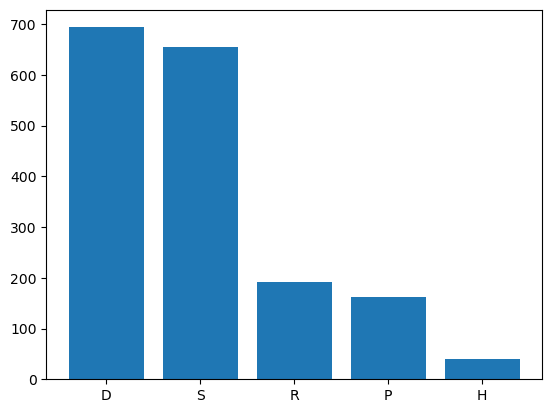

In [9]:
plt.bar(a1_va3.Phase.value_counts().index, a1_va3.Phase.value_counts().values);

- D and S have a lot of data
- but H P R have very less population
- this causes all models to have significantly lower F1 score for these 3 classes
- 1 way to tackle is balance the data

#### checking if the datasets have same timestamps

In [10]:
p1 = a1_va3.Phase
p2 = a1_raw.phase.map({'Rest': 'D', 'Stroke': 'S', 'Retraction': 'R', 'Preparation':'P', 'Hold': 'H'}).iloc[4:].reset_index(drop=True)
diff = (p1 == p2)
diff.value_counts()

True    1743
Name: count, dtype: int64

In [11]:
a1_raw.columns

Index(['lhx', 'lhy', 'lhz', 'rhx', 'rhy', 'rhz', 'hx', 'hy', 'hz', 'sx', 'sy',
       'sz', 'lwx', 'lwy', 'lwz', 'rwx', 'rwy', 'rwz', 'timestamp', 'phase'],
      dtype='object')

## Preprocessing

In [12]:
# joining the raw data and processed data

def join_raw_va3(data_raw, data_va3):
    # redundant column in both
    data_va3_new = data_va3.drop('Phase', axis=1)
    
    # reindex to account for the time gap for processed data
    data_raw = data_raw.iloc[4:].reset_index(drop=True)
    
    # add column names for the processed data (as it didn't have)
    data_va3_new.columns=['vlhx', 'vlhy', 'vlhz', 'vrhx', 'vrhy', 'vrhz', 'vlwx', 'vlwy', 'vlwz', 'vrwx', 'vrwy', 'vrwz', 'alhx', 'alhy', 'alhz', 'arhx', 'arhy', 'arhz', 'alwx', 'alwy', 'alwz', 'arwx', 'arwy', 'arwz', 'vlh', 'vrh', 'vlw', 'vrw', 'alh', 'arh', 'alw', 'arw']
    
    # outer join merge of the 2 datas
    final_data = pd.concat([data_raw, data_va3_new], axis=1)
    
    # make a common and labeled phase
    final_data['phase'] = final_data['phase'].map({'Rest': 'D', 'Stroke': 'S', 'Retraction': 'R', 'Preparation':'P', 'Hold': 'H'})
    return final_data

In [13]:
a1 = join_raw_va3(a1_raw, a1_va3)

In [14]:
a1['phase'].value_counts()

phase
D    694
S    656
R    191
P    163
H     39
Name: count, dtype: int64

<Axes: >

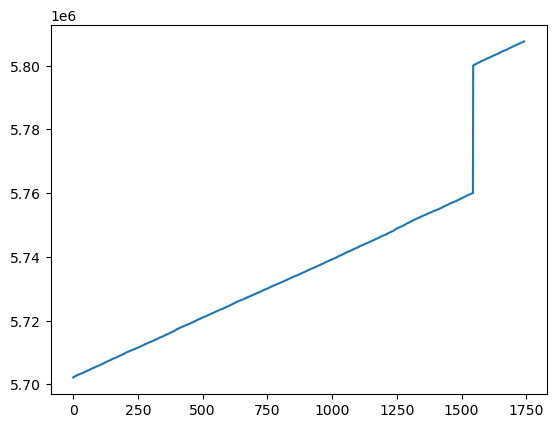

In [15]:
a1.timestamp.plot()

there is no data from 5.76 to 5.8 (e6) timestamps\
otherwise the timesteps are almost constant spaced

## EDA

### Data Distribution (Boxplots)

<Axes: >

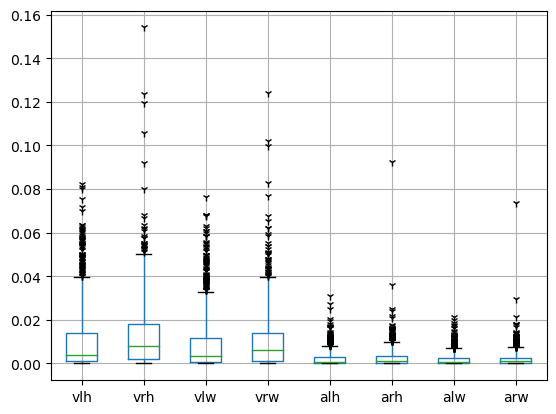

In [16]:
a1.loc[:, 'vlh': 'arw'].boxplot(sym='1', whis=2)

<Axes: >

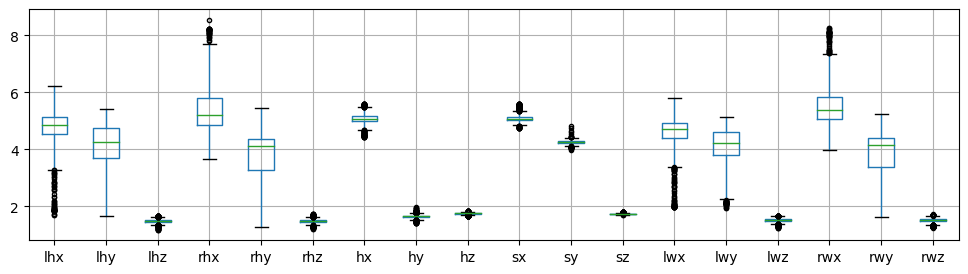

In [17]:
fig, ax = plt.subplots(figsize=(12, 3))
a1.loc[:, 'lhx': 'rwz'].boxplot(sym='.', whis=2)

head and spine data largely irrelevant??

<Axes: >

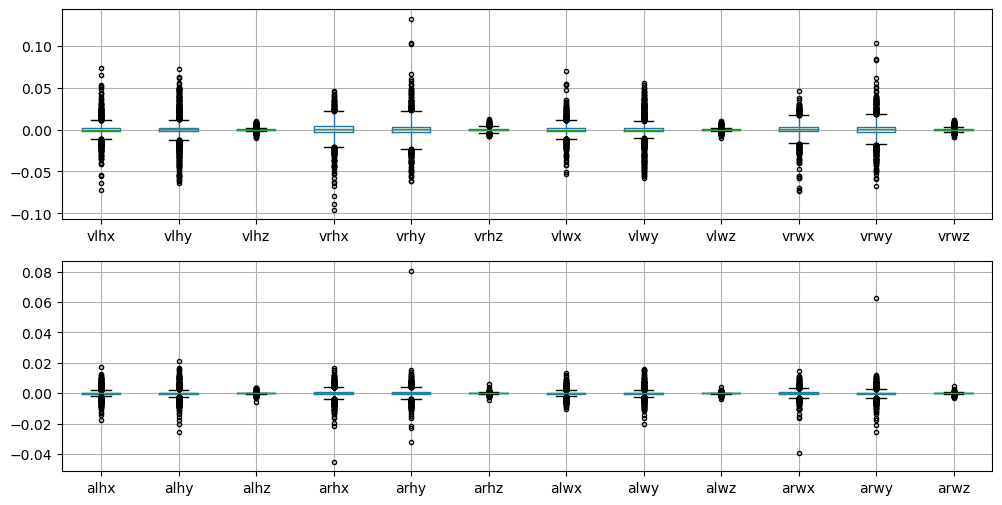

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
a1.loc[:, 'vlhx': 'vrwz'].boxplot(sym='.', whis=3, ax=ax1)
a1.loc[:, 'alhx': 'arwz'].boxplot(sym='.', whis=3, ax=ax2)

Data has a lot of outliers

### Distribution of features with phase

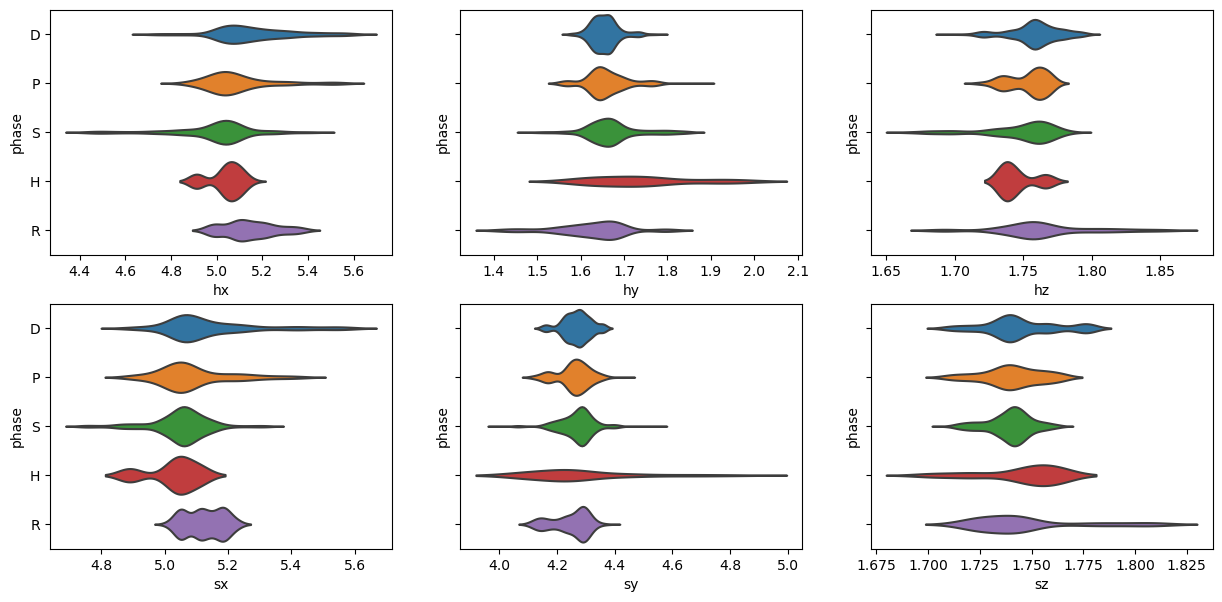

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True)

for i, col in enumerate(['hx', 'hy', 'hz', 'sx', 'sy', 'sz']):
    sns.violinplot(a1, x=col, y='phase', inner=None, ax=axes[i//3, i%3])

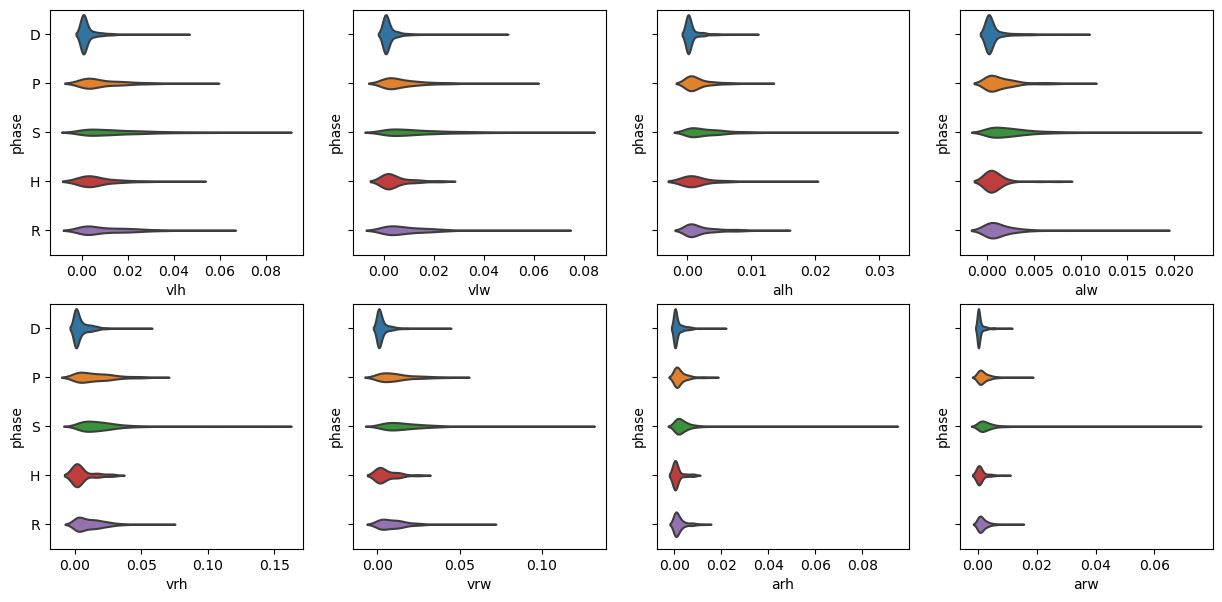

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(15, 7), sharey=True)

for i, col in enumerate(['vlh', 'vrh', 'vlw', 'vrw', 'alh', 'arh', 'alw', 'arw']):
    sns.violinplot(a1, x=col, y='phase', inner=None, ax=axes[i%2, i//2])

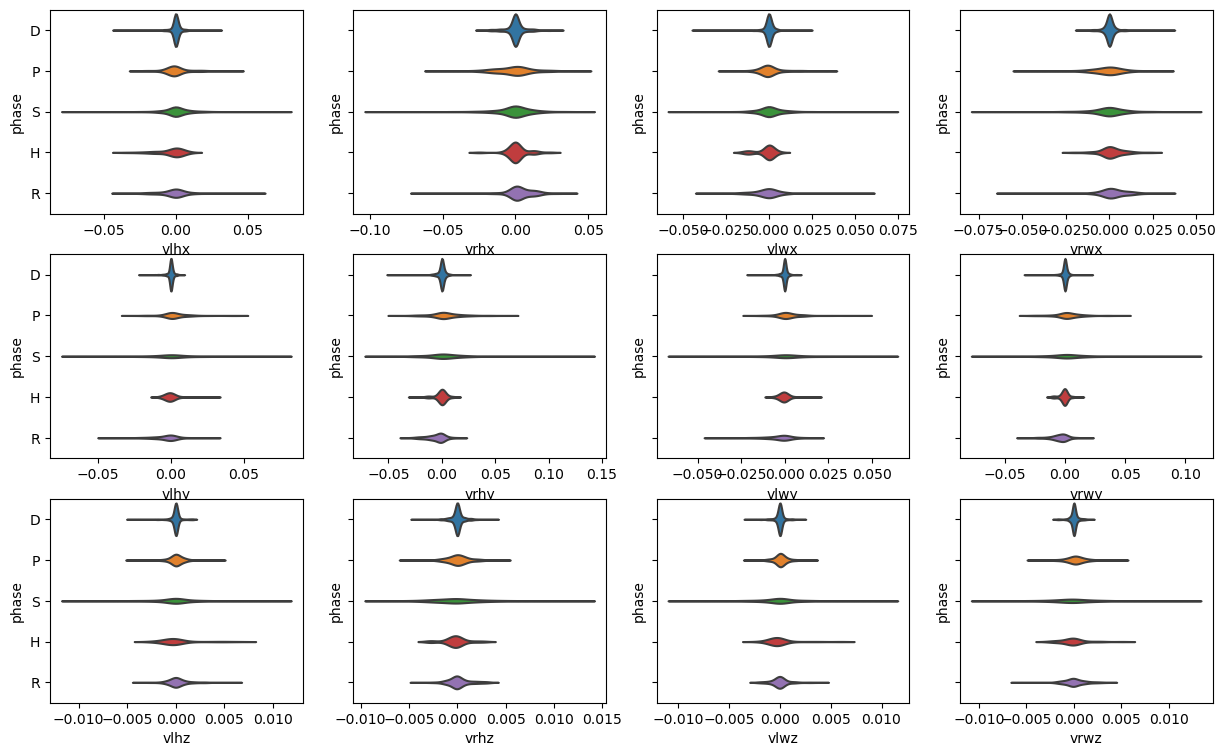

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(15, 9), sharey=True)

for i, body_part in enumerate(['vlh', 'vrh', 'vlw', 'vrw']):
    for j, coord in enumerate(['x', 'y', 'z']):
        sns.violinplot(a1, x=body_part+coord, y='phase', inner=None, ax=axes[j, i])

### Correlation

#### Correlation Matrix

<Axes: >

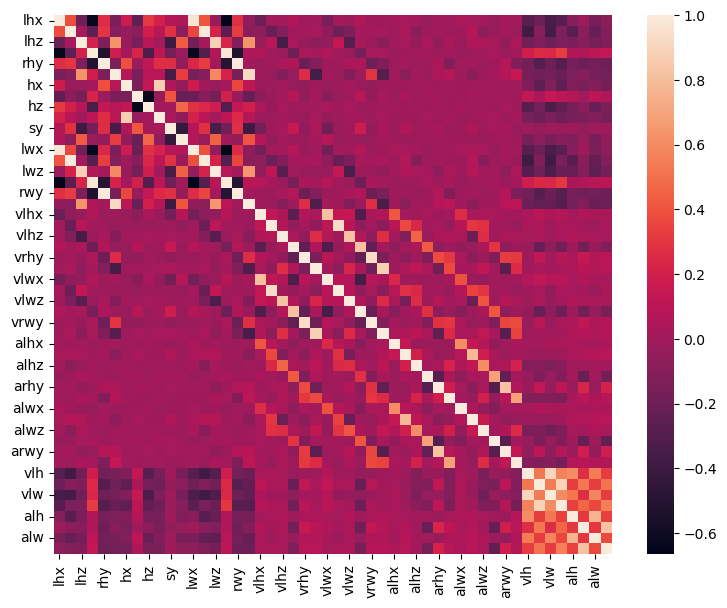

In [38]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(a1.drop(['timestamp', 'phase'], axis=1).corr())

by carefully considering various factors, we can significantly reduce the no of features \
an example is that the wrist and corresponding hand are highly correlated

#### highly correlated features

In [23]:
correlation_matrix = a1.drop(['timestamp', 'phase'], axis=1).corr()

# find pair of highly correlated features
threshold = 0.8

# Find the features whose correlation with any other feature is greater than the threshold
high_correlation_features = correlation_matrix[
    (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)
].stack().index.tolist()


hand and wrist are highly correlated

### Hist and Density Plots

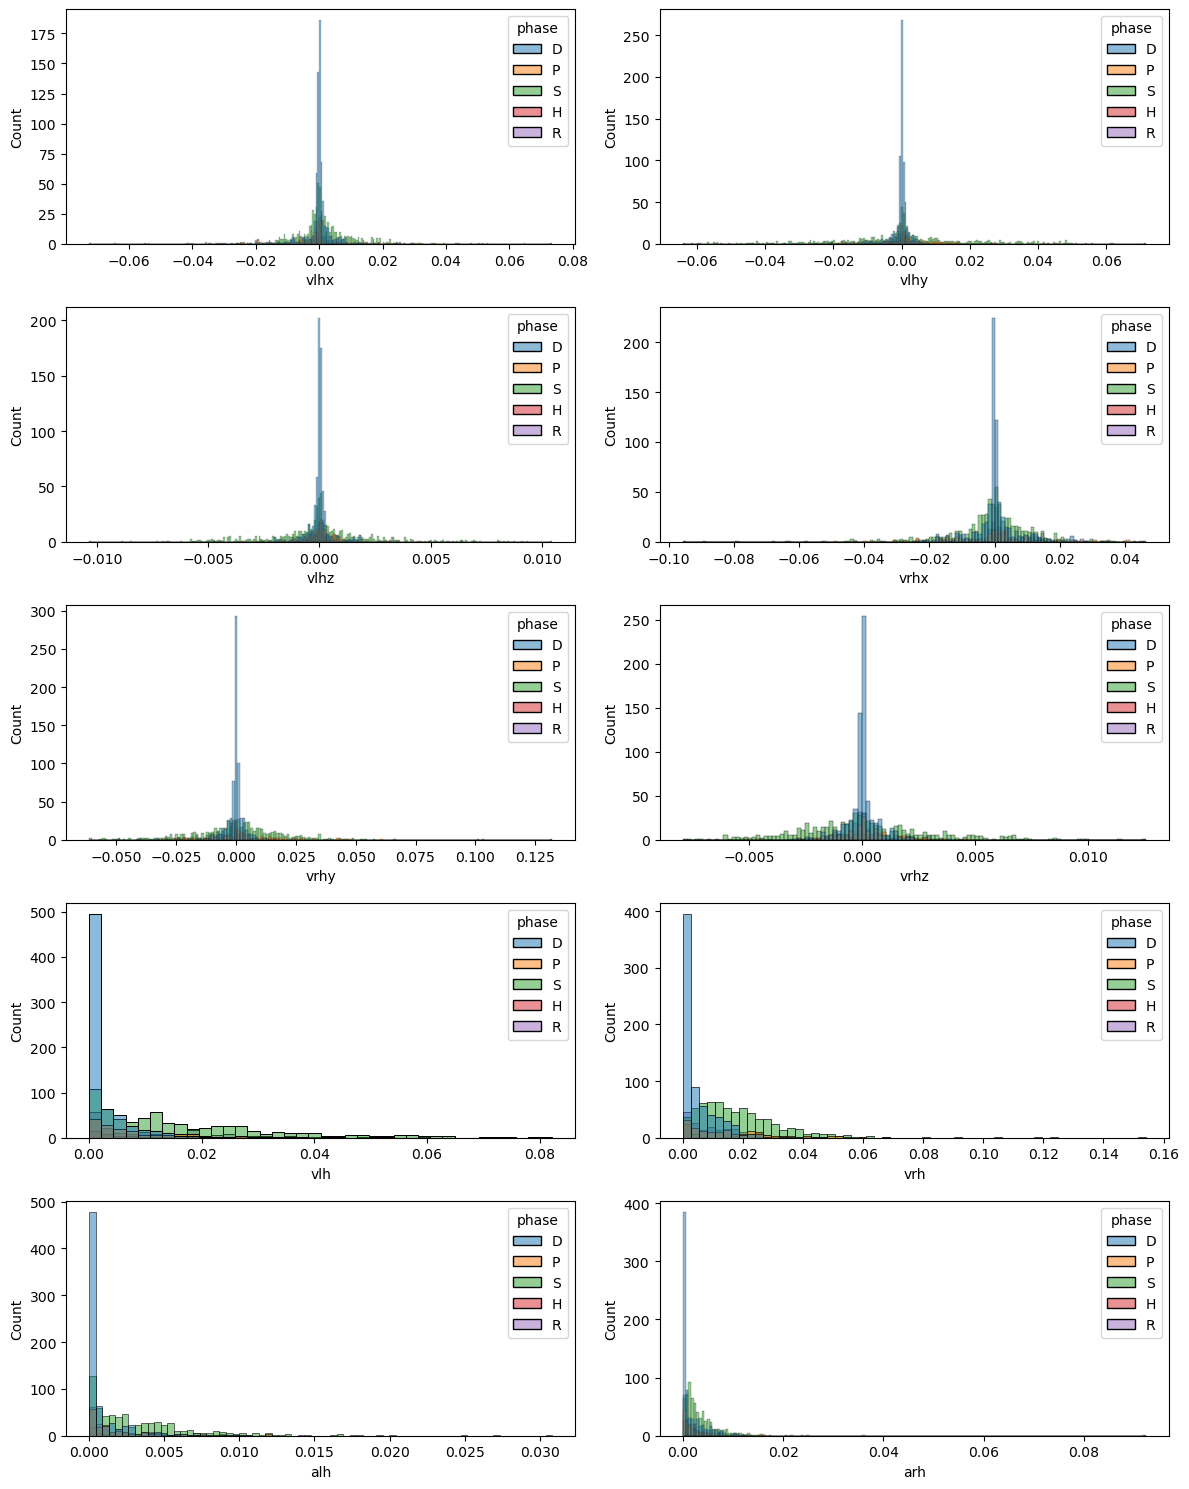

In [26]:
# plotting hist of all features simultaneously

features_to_plot_hist = ['vlhx', 'vlhy', 'vlhz', 'vrhx', 'vrhy', 'vrhz', 'vlh', 'vrh', 'alh', 'arh']

num_cols = 2
num_rows = np.ceil(len(features_to_plot_hist) / num_cols).astype(int)
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(6*num_cols, 3*num_rows))

for col, ax in zip(features_to_plot_hist, axes.flatten()):
    sns.histplot(a1, x=col, hue='phase', ax=ax)
    
plt.tight_layout()

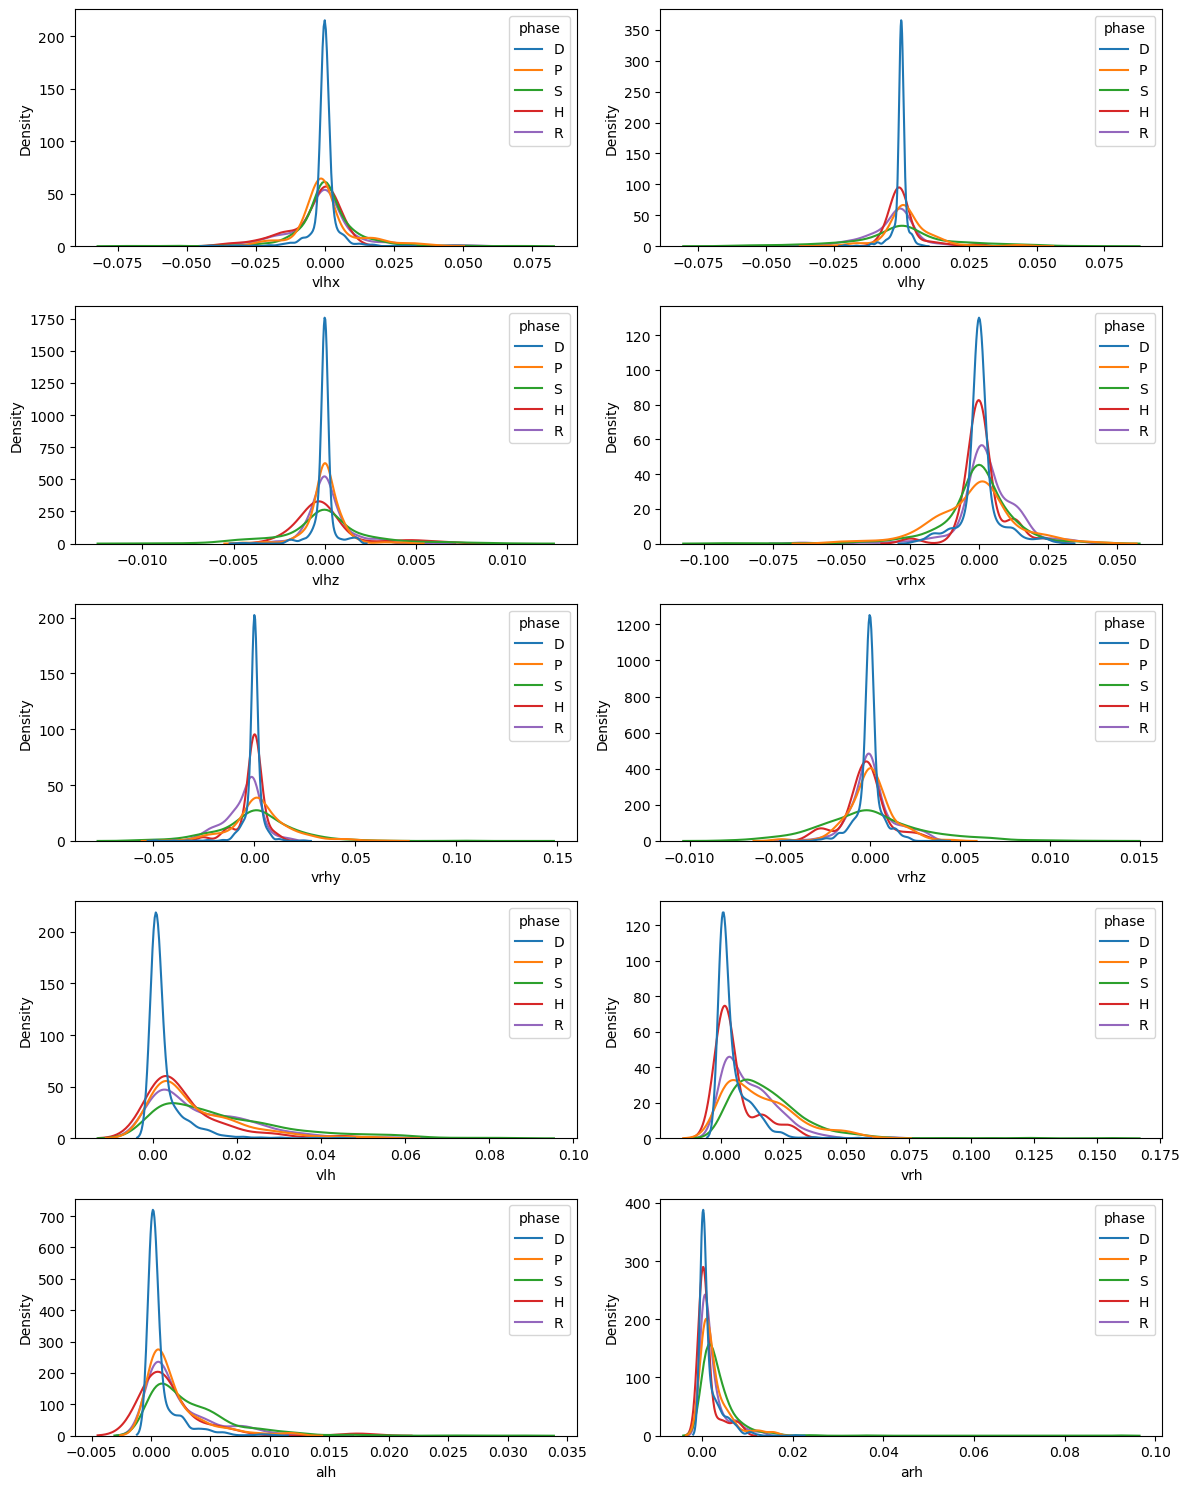

In [27]:
# plotting kde of all features simultaneously

features_to_plot_hist = ['vlhx', 'vlhy', 'vlhz', 'vrhx', 'vrhy', 'vrhz', 'vlh', 'vrh', 'alh', 'arh']

num_cols = 2
num_rows = np.ceil(len(features_to_plot_hist) / num_cols).astype(int)
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(6*num_cols, 3*num_rows))

for col, ax in zip(features_to_plot_hist, axes.flatten()):
    sns.kdeplot(a1, x=col, hue='phase', common_norm=False, ax=ax)
    
plt.tight_layout()

### Visualizing the whole dataset using dimensionality reduction

<Axes: xlabel='x', ylabel='y'>

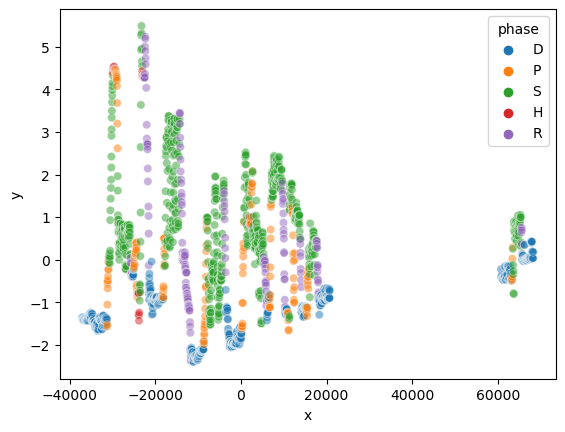

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

a1_pc = pd.DataFrame(pca.fit_transform(a1.drop('phase', axis=1)), columns=['x', 'y'])
a1_pc['phase'] = a1['phase']

sns.scatterplot(a1_pc, x='x', y='y', hue='phase', alpha=0.5)